In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('uber.csv')

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 8:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
df = df.drop(['Unnamed: 0', 'key'], axis = 1)

In [8]:
df.shape

(200000, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [11]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [13]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)

C:\Users\Rohan\AppData\Local\Temp\ipykernel_18700\3116941781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(), inplace=True)
C:\Users\Rohan\AppData\Local\Temp\ipykernel_18700\3116941781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [14]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors = 'coerce')

In [16]:
df.assign(hour = df.pickup_datetime.dt.hour,
          day = df.pickup_datetime.dt.day,
          month = df.pickup_datetime.dt.month,
          year = df.pickup_datetime.dt.year,
          dayofweek = df.pickup_datetime.dt.dayofweek)

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [17]:
df = df.drop('pickup_datetime', axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

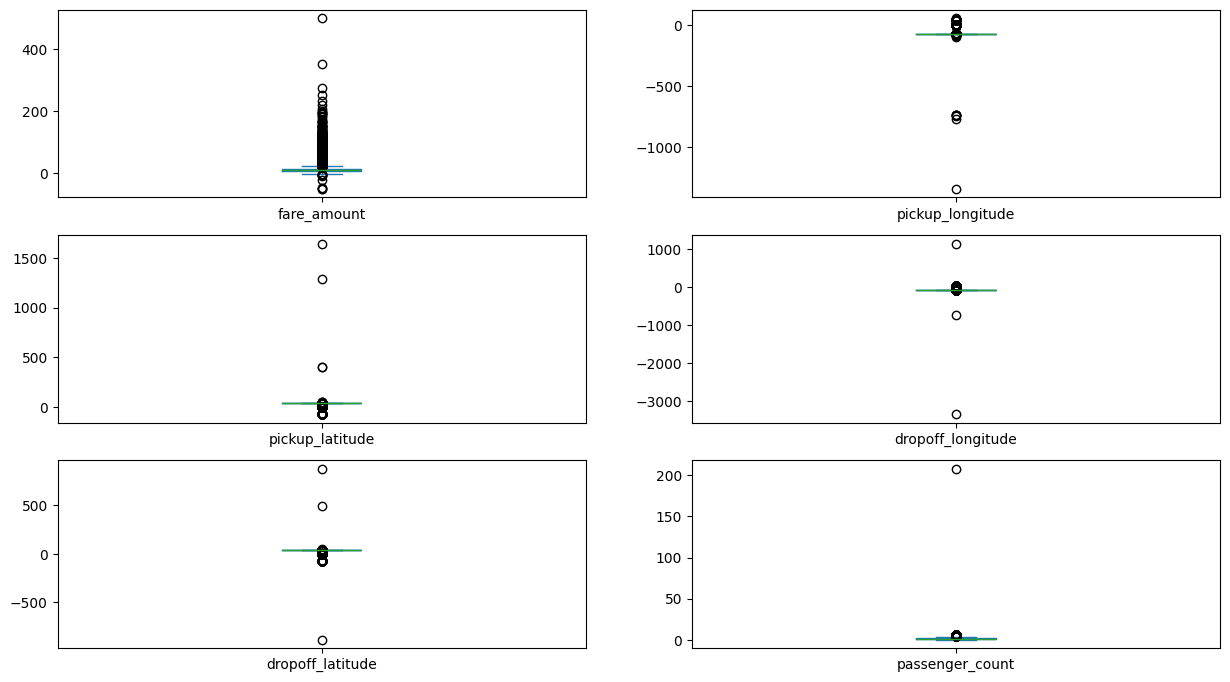

In [18]:
df.plot(kind = 'box', subplots=True, layout=(7,2), figsize=(15,20))

In [19]:
#Using the interquartile range to fill the values
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)
    return df1

def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df, c)
    return df1

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

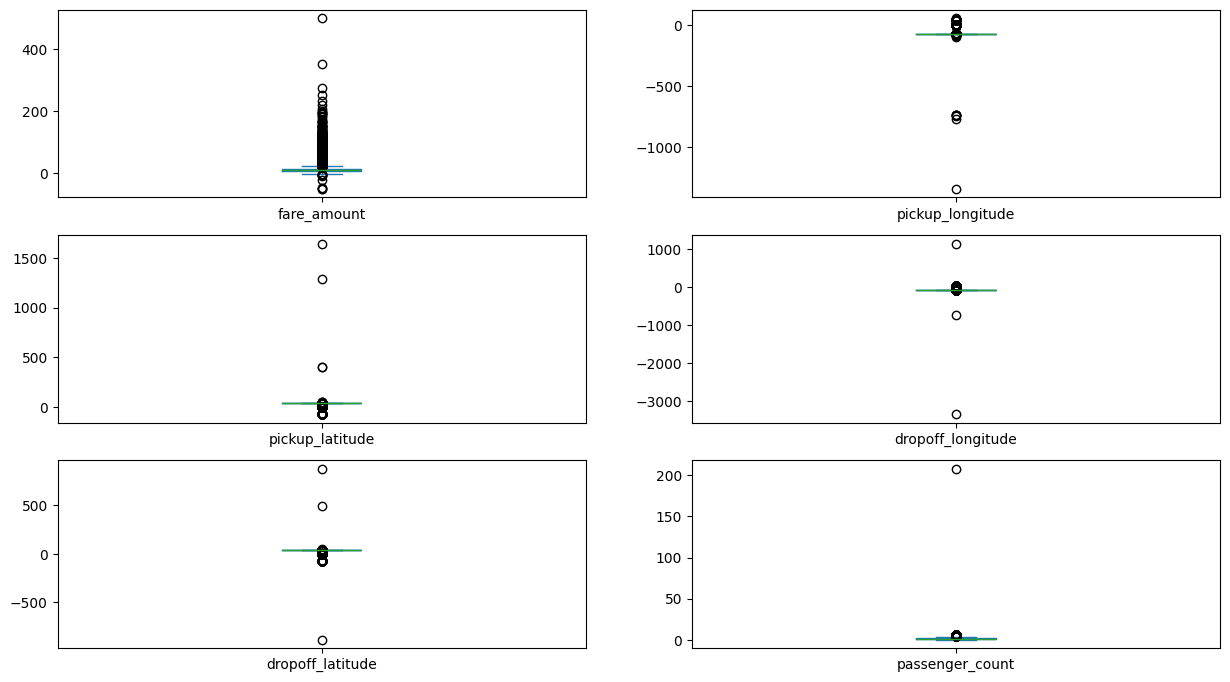

In [20]:
df.plot(kind='box', subplots=True, layout=(7,2), figsize=(15,20))

In [21]:
import haversine as hs

travel_dist = []

#Ensure valid coordinates
df = df.loc[
    (df['pickup_latitude'].between(-90,90)) &
    (df['dropoff_latitude'].between(-90,90)) &
    (df['pickup_longitude'].between(-180,180)) &
    (df['dropoff_longitude'].between(-180,180))
].copy()

for pos in range(len(df)):
    lat1, lon1 = df['pickup_latitude'].iloc[pos], df['pickup_longitude'].iloc[pos]
    lat2, lon2 = df['dropoff_latitude'].iloc[pos], df['dropoff_longitude'].iloc[pos]
    loc1 = (lat1, lon1)
    loc2 = (lat2, lon2)
    dist = hs.haversine(loc1, loc2)
    travel_dist.append(dist)

df['dist_travel_km'] = travel_dist
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475456


In [22]:
# Uber doesn't travel over 130kms so minimize distance
df = df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observations in the dataset:", df.shape)

Remaining observations in the dataset: (199988, 7)


In [25]:
# Finding incorrect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) | (df.pickup_latitude < -90)|
                               (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                               (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                            ]

In [26]:
df.drop(incorrect_coordinates, inplace=True, errors='ignore')

In [27]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dist_travel_km       0
dtype: int64

<Axes: >

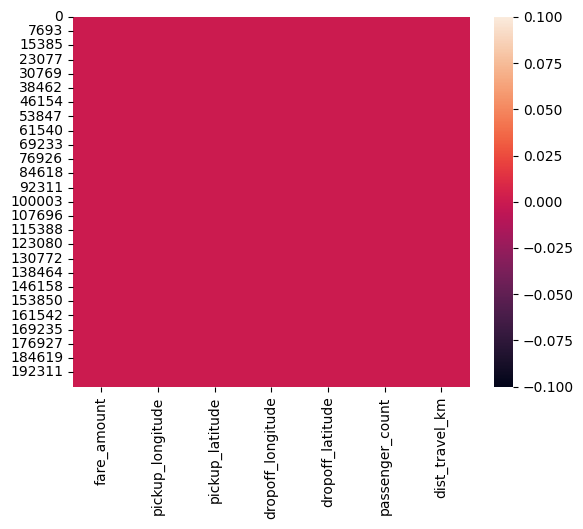

In [28]:
sns.heatmap(df.isnull())

In [29]:
corr = df.corr()

In [30]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
fare_amount,1.000000,0.011635,-0.011561,0.011870,-0.012258,0.010159,0.024723
pickup_longitude,0.011635,1.000000,-0.979048,0.949698,-0.936642,-0.000756,0.163547
pickup_latitude,-0.011561,-0.979048,1.000000,-0.936690,0.958143,-0.000523,-0.142200
dropoff_longitude,0.011870,0.949698,-0.936690,1.000000,-0.979692,-0.000374,0.140680
dropoff_latitude,-0.012258,-0.936642,0.958143,-0.979692,1.000000,-0.001387,-0.124660
passenger_count,0.010159,-0.000756,-0.000523,-0.000374,-0.001387,1.000000,-0.001621
dist_travel_km,0.024723,0.163547,-0.142200,0.140680,-0.124660,-0.001621,1.000000


<Axes: >

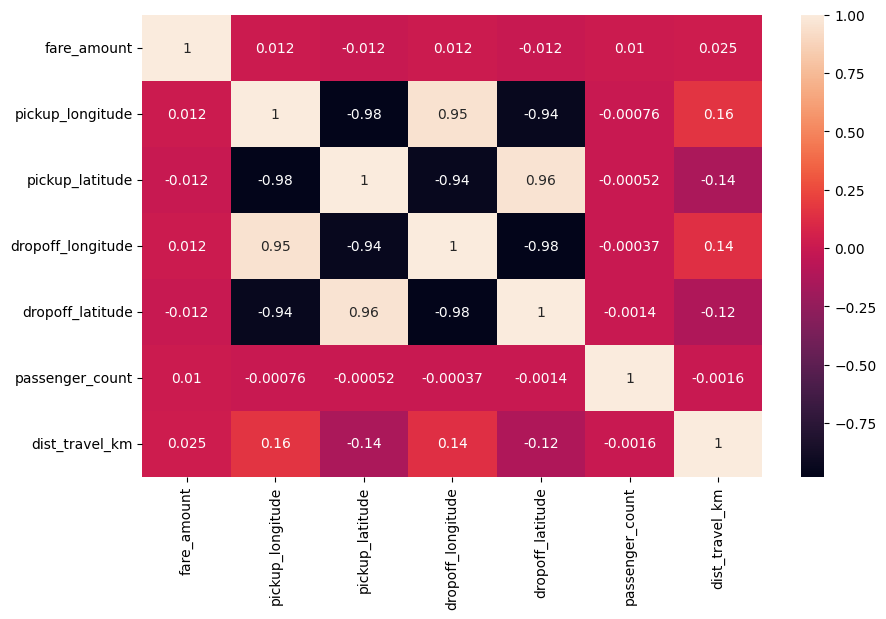

In [31]:
fig, axis = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [33]:
x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist_travel_km']]
y = df['fare_amount']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [34]:

# Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:

regression.intercept_

np.float64(11.843991293909106)

In [36]:
prediction = regression.predict(X_test)
prediction

array([11.28520393, 11.28602721, 11.28695521, ..., 11.28426904,
       11.28361257, 11.28494416], shape=(65997,))

In [37]:

#R2, MSE, RMSE
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.00044304891570490224

In [38]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, prediction)
MSE

98.95231107968407

In [39]:
RMSE = np.sqrt(MSE)
RMSE

np.float64(9.94747762398509)